In [1]:
#Environment Setup and Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# For inline plotting
%matplotlib inline

## Synthetic Data Generation

Based on insights from the Rwandan curriculum and our proposal, we simulate student records that include:
- Academic performance (Grade)
- Attendance
- Interest ratings in Math and Science
- Demographic info (Age, Gender, School Location)
- An "Optimal_Track" (e.g., STEM, Humanities, Arts, Business)

We'll generate 1000 records.


In [2]:
def generate_synthetic_data(n=1000):
    # Simulate academic grades (assuming an average of 78, std=8, adjusted from real stats)
    grades = np.clip(np.random.normal(loc=78, scale=8, size=n), 0, 100)

    # Simulate attendance (85-100%)
    attendance = np.random.uniform(85, 100, n)

    # Dropout indicator (10% dropout rate)
    dropout = np.random.binomial(1, 0.10, n)

    # Interest ratings (scale 1-5) in Math and Science
    interest_math = np.random.randint(1, 6, n)
    interest_science = np.random.randint(1, 6, n)

    # Demographic: age between 15 and 20, gender, and school location
    age = np.random.randint(15, 21, n)
    gender = np.random.choice(["Male", "Female"], n)
    school_location = np.random.choice(["Urban", "Peri-Urban"], n, p=[0.7, 0.3])

    # Determine Optimal Track based on a simple rule:
    tracks = []
    for i in range(n):
        # If a student has high grades and high interest in both Math and Science, recommend STEM
        if grades[i] > 85 and interest_math[i] >= 4 and interest_science[i] >= 4:
            tracks.append("STEM")
        elif grades[i] > 70:
            # Randomly choose between Humanities and Business if grades are moderately high
            tracks.append(np.random.choice(["Humanities", "Business"]))
        else:
            tracks.append("Arts")

    data = pd.DataFrame({
        "Grade": grades,
        "Attendance": attendance,
        "Dropout": dropout,
        "Interest_Math": interest_math,
        "Interest_Science": interest_science,
        "Age": age,
        "Gender": gender,
        "School_Location": school_location,
        "Optimal_Track": tracks
    })
    return data

# Generate the synthetic dataset and preview it
df = generate_synthetic_data(1000)
df.head()


,Grade,Attendance,Dropout,Interest_Math,Interest_Science,Age,Gender,School_Location,Optimal_Track
0,58.716135,93.430218,0,4,5,18,Male,Urban,Arts
1,79.895896,89.258228,0,5,2,16,Female,Peri-Urban,Humanities
2,75.895392,95.753909,0,2,1,16,Male,Urban,Business
3,95.374414,97.926281,0,2,1,18,Female,Urban,Humanities
4,71.303829,90.727444,0,3,1,16,Female,Urban,Humanities


Dataset Shape: (1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             1000 non-null   float64
 1   Attendance        1000 non-null   float64
 2   Dropout           1000 non-null   int64  
 3   Interest_Math     1000 non-null   int64  
 4   Interest_Science  1000 non-null   int64  
 5   Age               1000 non-null   int64  
 6   Gender            1000 non-null   object 
 7   School_Location   1000 non-null   object 
 8   Optimal_Track     1000 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 70.4+ KB
None


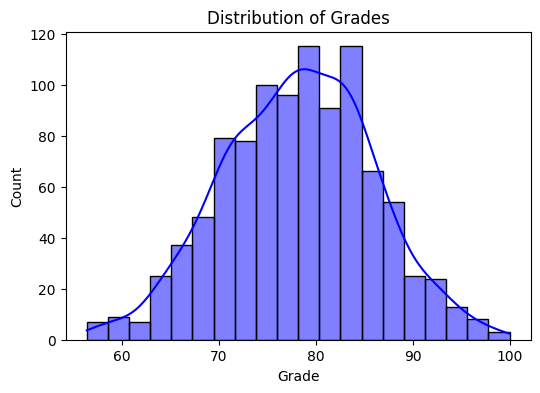

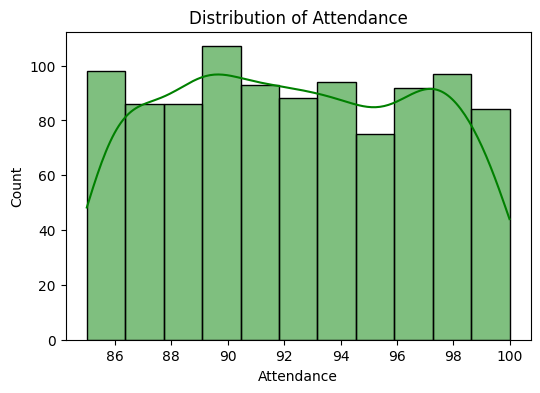

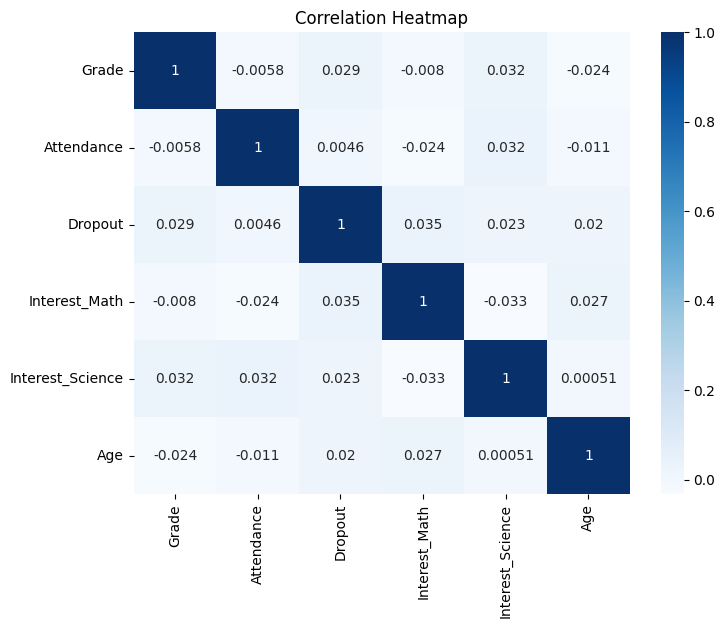

In [6]:
## Exploratory Data Analysis (EDA)

# Dataset shape and basic info
print("Dataset Shape:", df.shape)
print(df.info())

# Summary statistics
df.describe()

# Distribution of Grades
plt.figure(figsize=(6,4))
sns.histplot(df['Grade'], kde=True, color='blue')
plt.title("Distribution of Grades")
plt.show()

# Attendance Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Attendance'], kde=True, color='green')
plt.title("Distribution of Attendance")
plt.show()

numeric_df = df.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


In [7]:
## Data Engineering & Feature Selection

# Encode the target variable
track_mapping = {"STEM": 0, "Humanities": 1, "Arts": 2, "Business": 3}
df["Track_Encoded"] = df["Optimal_Track"].map(track_mapping)

# Define features (X) and target (y)
X = df[["Grade", "Attendance", "Interest_Math", "Interest_Science", "Age"]]
y = df["Track_Encoded"]

# Check the head of the feature matrix
X.head()


,Grade,Attendance,Interest_Math,Interest_Science,Age
0,58.716135,93.430218,4,5,18
1,79.895896,89.258228,5,2,16
2,75.895392,95.753909,2,1,16
3,95.374414,97.926281,2,1,18
4,71.303829,90.727444,3,1,16


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.55      0.49      0.52        99
           2       1.00      1.00      1.00        24
           3       0.39      0.45      0.42        71

    accuracy                           0.55       200
   macro avg       0.74      0.69      0.71       200
weighted avg       0.56      0.55      0.55       200



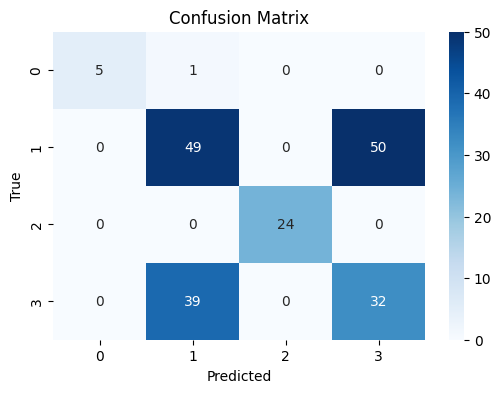

In [8]:
##Model Architecture and Training
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## 6. Deployment Options and Next Steps

### 6.1 Web Interface
The plan is to deploy the model via a Flask application, which will provide an endpoint to get recommendations based on user input.

### 6.2 API Documentation
For API testing and integration, I will use Swagger UI or Postman.

### 6.3 Future Enhancements
- Fine-tune the model by exploring additional features.
- Integrate real data once  available.

---

## 7. Conclusion

This notebook has provided a small walkthrough of the process:

The generation and exploration of synthetic data inspired by Rwandan educational statistics.

Feature engineering and the training of a Random Forest classifier for academic track prediction.

An initial evaluation of our model’s performance using standard metrics.

As I acquire real data, the data loading and preprocessing sections will be updated accordingly. The insights gained from this prototype will serve as a starting point for further development and refinement.
